# Análise univariada

A análise univariada corresponde a um processo de análise de dados que consiste em analisar um único atributo de um conjunto de dados por vez. Dessa forma, cada atributo é analisado individualmente de acordo com suas próprias características.

Como referência está sendo utilizado [este guia](https://www.data-to-viz.com/).

## Preparando o ambiente

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Carregando os dados

In [64]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


## Análises

Lista dos atributos que serão analisados:

* country	
* region	
* score	
* gdp	
* social_support	
* hle	
* freedom	
* generosity	
* corruption	
* positive_affect	
* negative_affect	
* year

### `country`

Variável **qualitativa categórica nominal**. A visualização mais adequada para este tipo de dado em uma análise exploratória é o gráfico de barras.

#### 1. Quantos países estão presentes nos dados?

In [6]:
len(dataset['country'].unique())

166

#### 2. Quais países realizaram mais pesquisas?

In [18]:
country_count = pd.DataFrame(dataset['country'].value_counts()).reset_index().rename(columns={'index':'country', 'country':'count'})

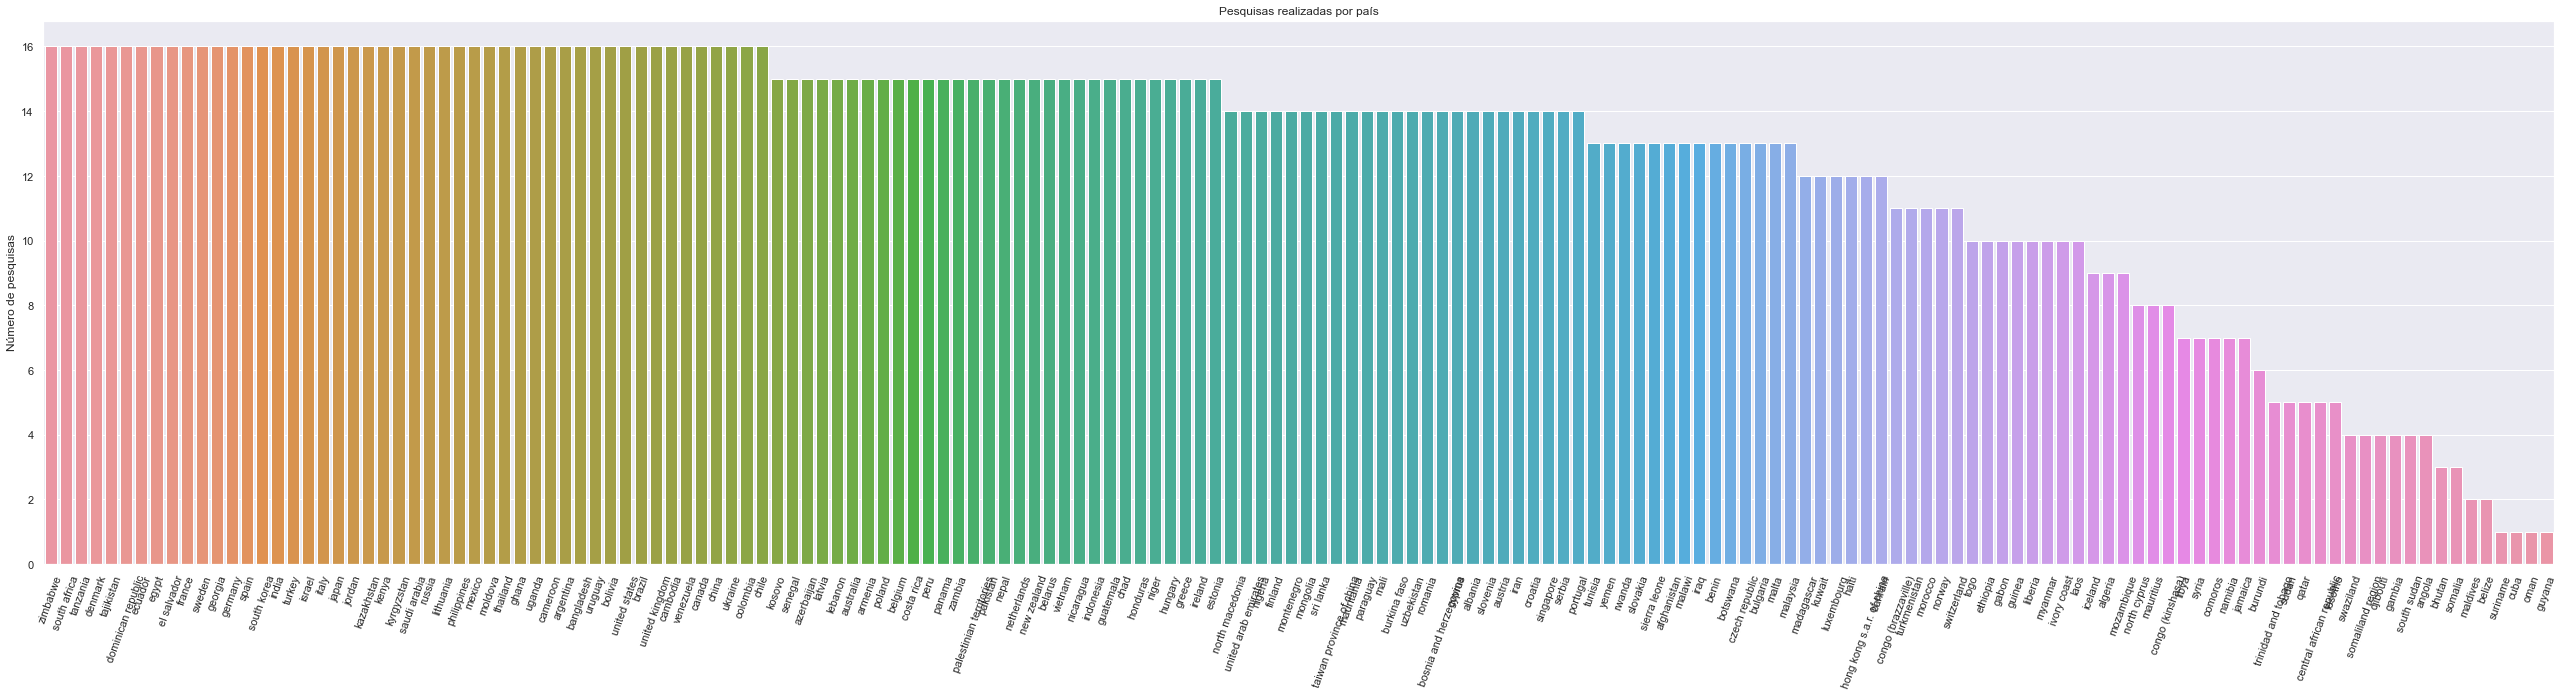

In [31]:
sns.set(rc={'figure.figsize':(45,10)})
sns.barplot(data=country_count, x= 'country', y='count')
plt.xticks(rotation=70)
plt.title('Pesquisas realizadas por país')
plt.xlabel('')
plt.ylabel('Número de pesquisas')
plt.show();

Como são muitos países fica difícil de entender o gráfico dessa forma. Para melhorar a visualização de presença de países na pesquisa vamos fazer uma visualização por presença:

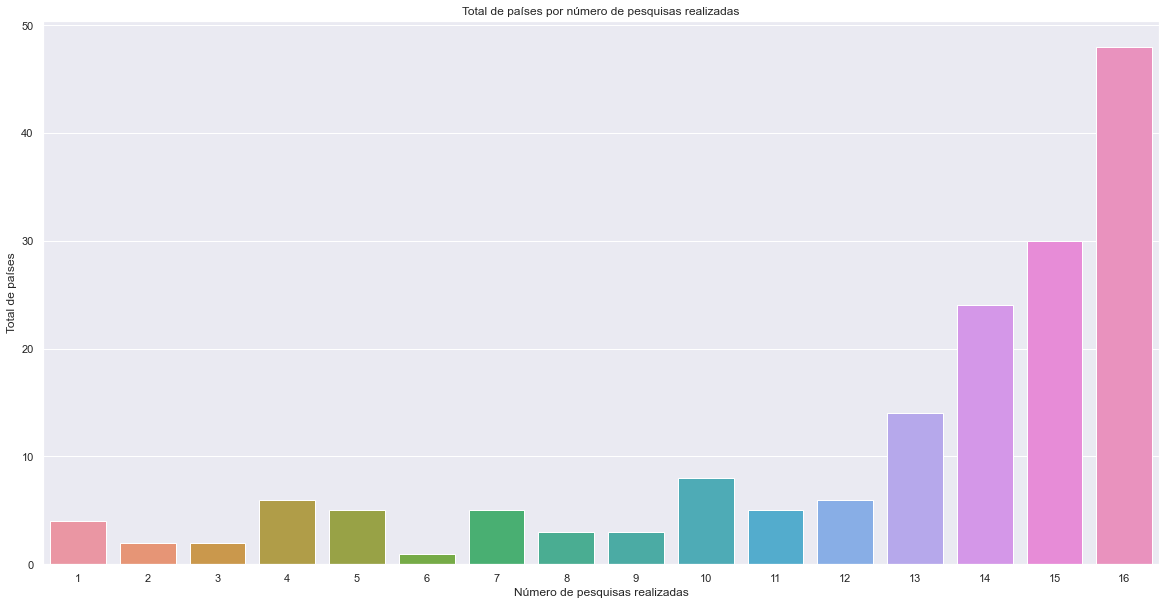

In [48]:
sns.set(rc={'figure.figsize':(20,10)})
responses_country_count = pd.DataFrame(country_count['count'].value_counts()).reset_index().rename(columns={'index':'count', 'count':'n_countries'}).sort_values(by='count', ascending=False)
sns.barplot(data=responses_country_count, x= 'count', y='n_countries')
plt.title('Total de países por número de pesquisas realizadas')
plt.ylabel('Total de países')
plt.xlabel('Número de pesquisas realizadas')
plt.show();

É possível perceber que grande parte dos países presentes têm mais do que 13 pesquisas.

In [57]:
gt13 = np.sum(responses_country_count.query('count >= 13')['n_countries']) / np.sum(responses_country_count['n_countries']) * 100
print(f'Um total de {round(gt13, 2)}% dos países presentes no dataset possuem mais de 13 pesquisas realizadas ')

Um total de 69.88% dos países presentes no dataset possuem mais de 13 pesquisas realizadas 


Dos países com menos de 13 respostas, a distribuição é:

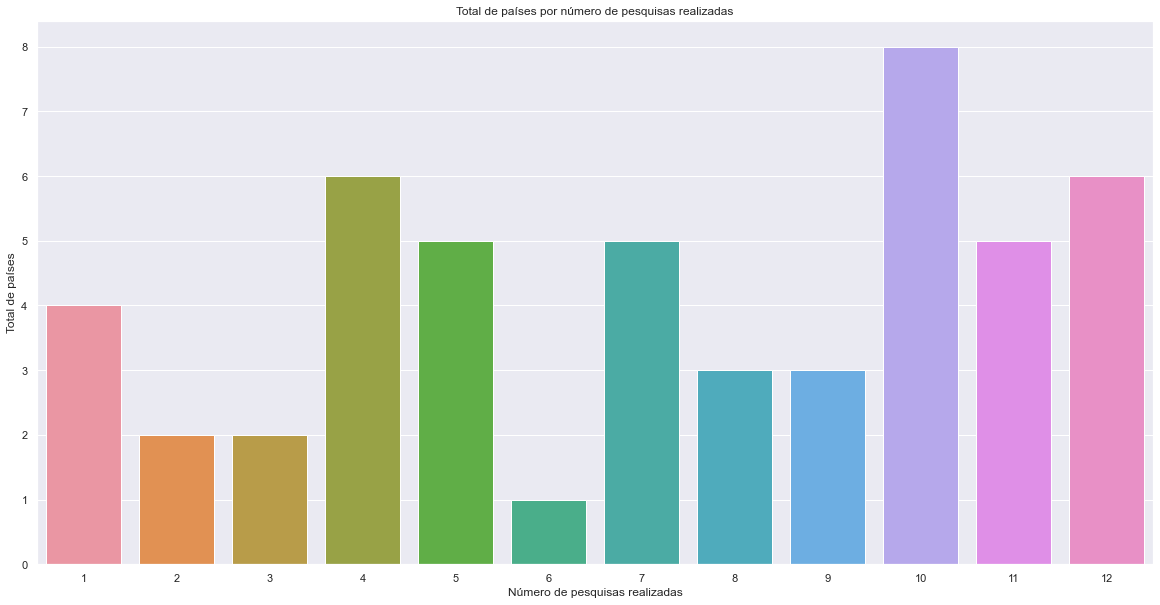

In [58]:
sns.barplot(data=responses_country_count.query('count < 13'), x= 'count', y='n_countries')
plt.title('Total de países por número de pesquisas realizadas')
plt.ylabel('Total de países')
plt.xlabel('Número de pesquisas realizadas')
plt.show();

Os três valores mais frequentes são 10, 12 e 4, mas claramente uma minoria dos países respondeu menos do que 5 vezes a pesquisa. Dessa forma é possível considerar os dados com uma distribuição razoável e equilibrada entre os países. No entanto é necessário manter a atenção na criação dos modelos de ML para, caso necessário, remover países com poucos dados para evitar distorção nos modelos.

In [60]:
lte5 = np.sum(responses_country_count.query('count <= 5')['n_countries']) / np.sum(responses_country_count['n_countries']) * 100
print(f'Um total de {round(lte5, 2)}% dos países presentes no dataset possuem 5 ou menos pesquisas realizadas ')

Um total de 11.45% dos países presentes no dataset possuem 5 ou menos pesquisas realizadas 


#### 3. Análises multivariadas recomendadas

* Relação entre o score e o número de pesquisas realizadas pelo país
* Presença anual de países na pesquisa
* Relação entre as métricas e o número de pesquisas realizadas.

### `region`

Variável **qualitativa categórica nominal**. A visualização mais adequada para este tipo de dado em uma análise exploratória é o gráfico de barras.

#### 1. Quais regiões são mais presentes nos dados?

In [65]:
dataset['region'].value_counts()

sub-saharan africa       463
asia                     321
latin amer. and carib    309
western europe           292
eastern europe           196
c.w. of ind. states      182
near east                171
northern africa           56
baltics                   46
northern america          32
oceania                   30
Name: region, dtype: int64

In [69]:
region_frequency = pd.DataFrame(dataset['region'].value_counts()).reset_index().rename(columns={'index':'region', 'region':'count'})

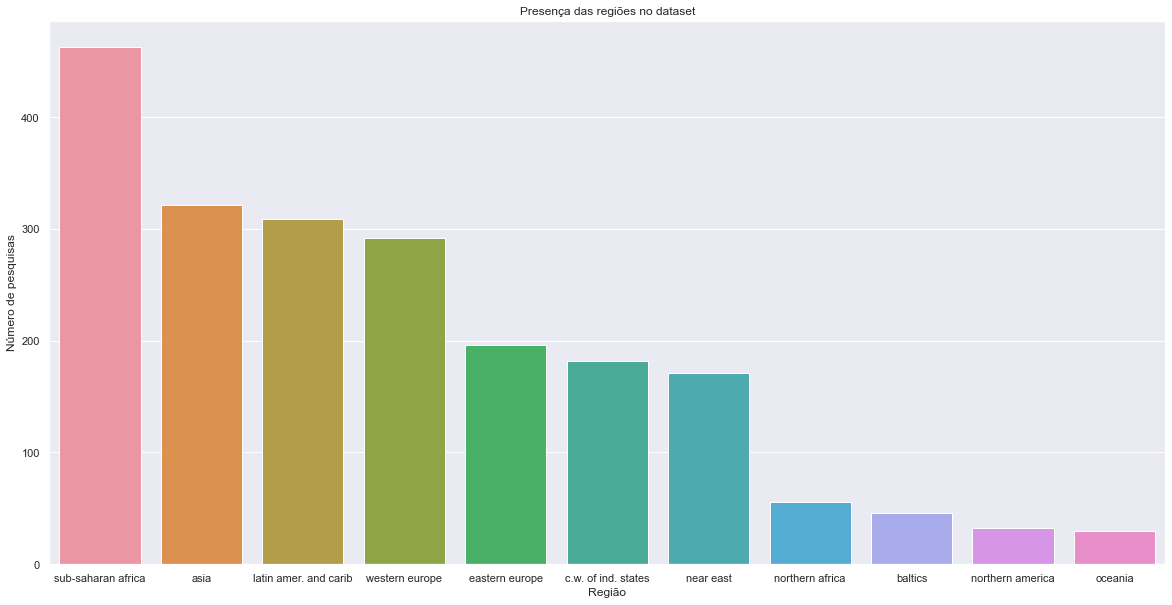

In [71]:
sns.barplot(data=region_frequency, x= 'region', y='count')
plt.title('Presença das regiões no dataset')
plt.ylabel('Número de pesquisas')
plt.xlabel('Região')
plt.show();

Existe uma grande disparidade entre as regiões do mundo pesquisadas. A hipótese é a quantidade de países presentes em cada região. Isso pode vir a prejudicar algumas hipóteses da modelagem.

#### 2. Análises multivariadas recomendadas

* Relação entre o score e o número de pesquisas realizadas por região
* Média de pesquisas realizadas por país por região
* Distribuição das pesquisas por região ao longo dos anos.

### `score`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição dos scores?

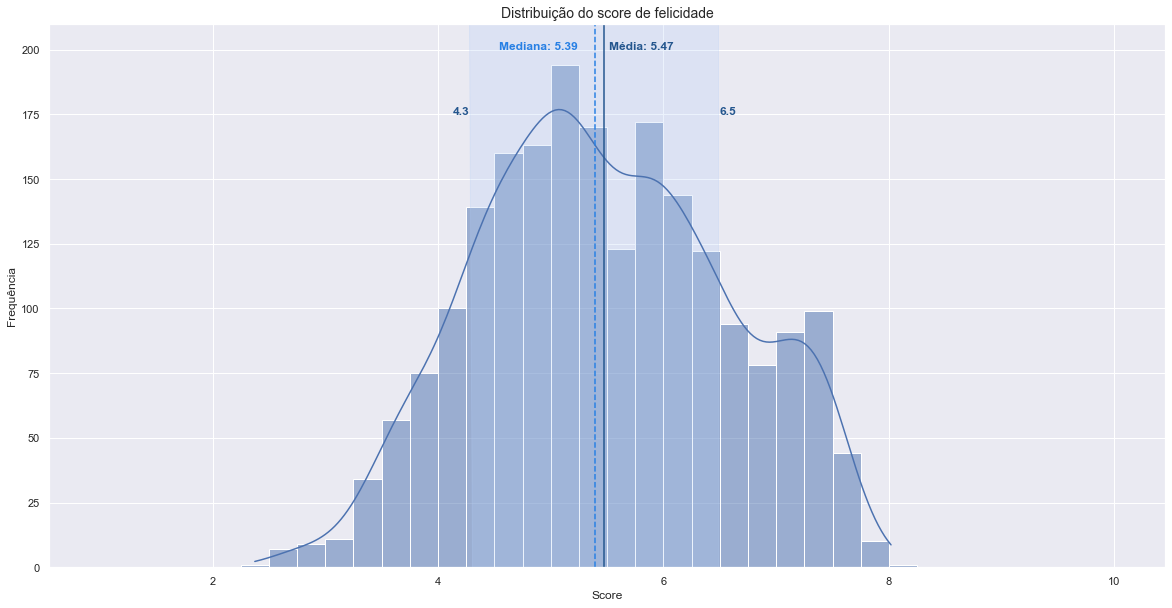

In [171]:
ax = sns.histplot(dataset['score'], binrange=(1,10), kde=True)
plt.title('Distribuição do score de felicidade', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['score']), 2)
rounded_median = round(np.median(dataset['score']), 2)
rounded_std = round(np.std(dataset['score']), 2)
lower_std = rounded_median - rounded_std
upper_std = rounded_median + rounded_std

plt.axvline(x=np.mean(dataset['score']), color='#24568E')
plt.text(np.mean(dataset['score']) + 0.05,200,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['score']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['score']) - 0.85,200,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.15, 175,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 175,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [210],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 210)

plt.show();

In [170]:
(len(dataset.query('score >= 4.3 and score < 6.6')) / len(dataset)) * 100

67.06387035271688

É possível observar que o score se concentra entre $4.3$ e $6.5$, tendo mais de $67$% dos dados presentes nesse intervalo. A Média é $5.47$ e a mediana $5.39$.

Dado que a pergunta é definir entre 1 a 10 a posição da sua vida sendo 1 a pior possível e 10 a melhor possível, ninguém acha que não poderia ser pior e também ninguém acha que não poderia ser melhor.

#### 2. Análises multivariadas recomendadas

* Score ao longo dos anos
* Score por região e país ao longo dos anos
* Correlação do score com as métricas.

### `gdp`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição do gdp?

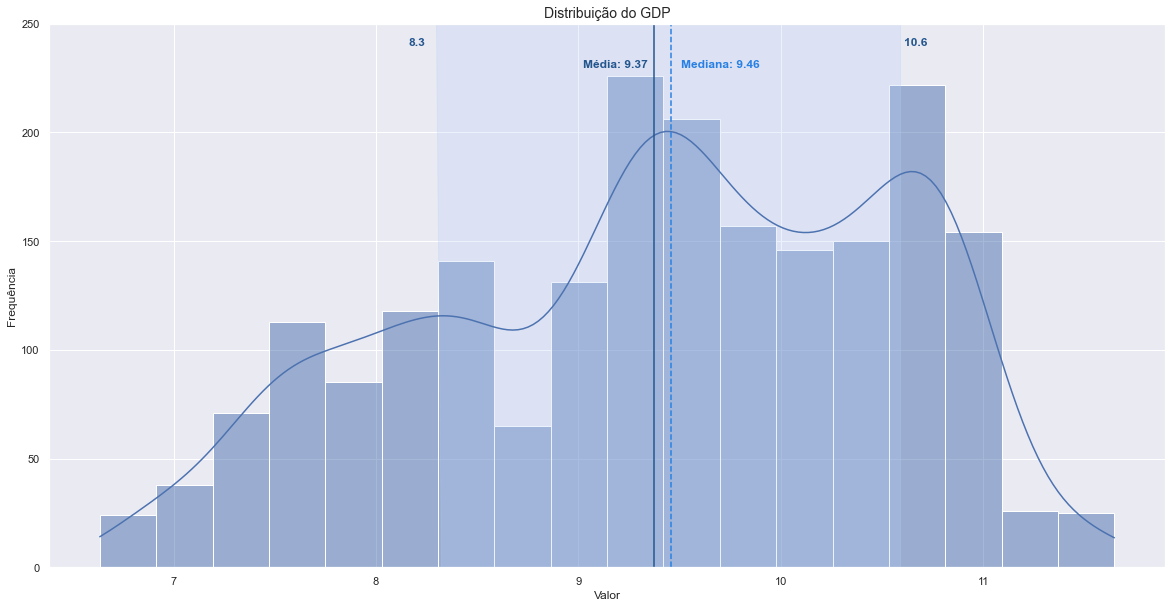

In [195]:
ax = sns.histplot(dataset['gdp'], kde=True)
plt.title('Distribuição do GDP', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['gdp']), 2)
rounded_median = round(np.median(dataset['gdp']), 2)
rounded_std = round(np.std(dataset['gdp']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['gdp']), color='#24568E')
plt.text(np.mean(dataset['gdp']) - 0.35,230,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['gdp']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['gdp']) + 0.05,230,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.15, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [250],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 250)

plt.show();

A distribuição acontece entre $6.6$ e $11.64$ com média $9.37$ e mediana $9.46$.

#### 2. Análises multivariadas recomendadas

* Relação entre GDP e score
* Relação entre GDP e região do mundo
* GDP (total e por região) ao longo do tempo

### `social_support`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da social_support?

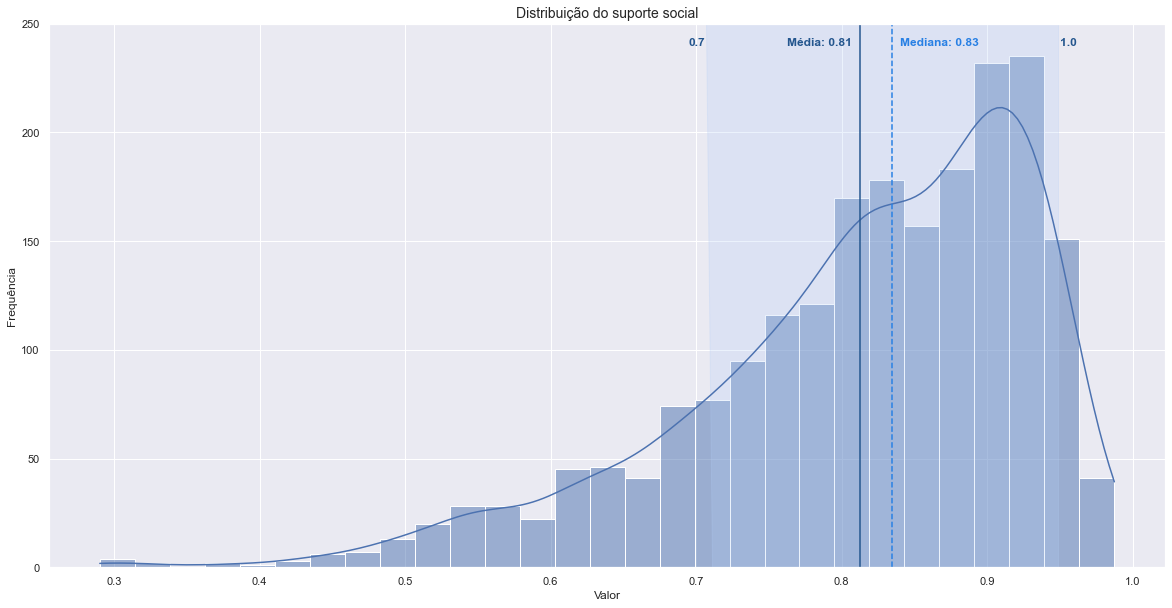

In [209]:
ax = sns.histplot(dataset['social_support'], kde=True)
plt.title('Distribuição do suporte social', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['social_support']), 2)
rounded_median = round(np.median(dataset['social_support']), 2)
rounded_std = round(np.std(dataset['social_support']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['social_support']), color='#24568E')
plt.text(np.mean(dataset['social_support']) - 0.05,240,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['social_support']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['social_support']) + 0.005,240,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.015, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [250],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 250)

plt.show();

Social Support é a métrica até então com melhores valores ao todo.

#### 2. Análises multivariadas recomendadas

* Relação entre social_support e score
* Relação entre social_support e região do mundo
* social_support (total e por região) ao longo do tempo

### `hle`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da hle?

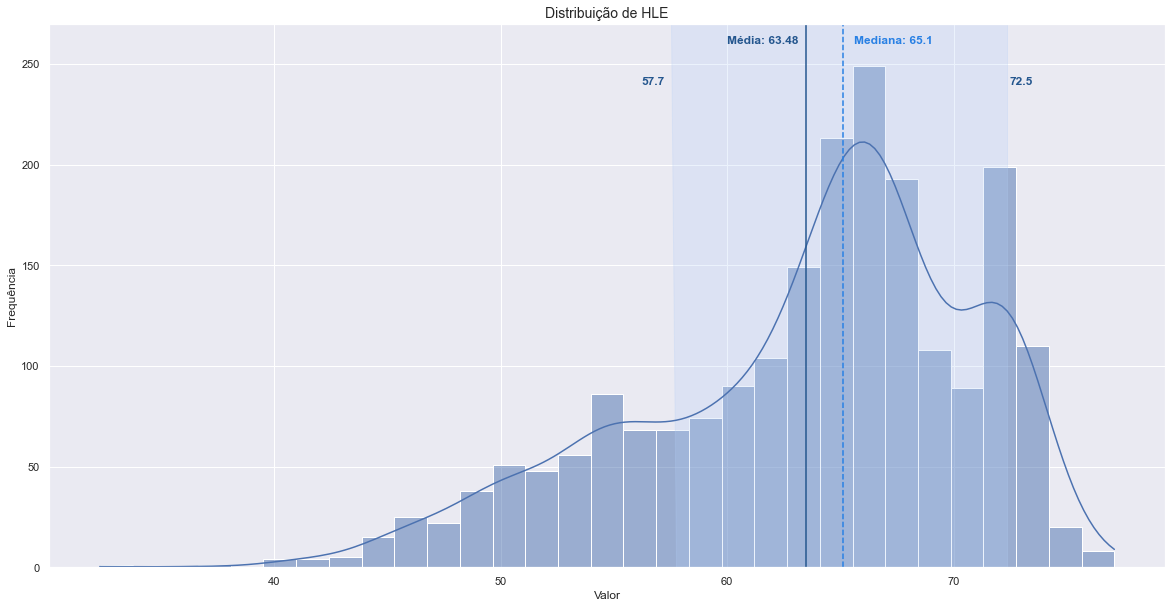

In [223]:
ax = sns.histplot(dataset['hle'], kde=True)
plt.title('Distribuição de HLE', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['hle']), 2)
rounded_median = round(np.median(dataset['hle']), 2)
rounded_std = round(np.std(dataset['hle']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['hle']), color='#24568E')
plt.text(np.mean(dataset['hle']) - 3.5,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['hle']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['hle']) + 0.5,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 1.5, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

#### 2. Análises multivariadas recomendadas

* Relação entre hle e score
* Relação entre hle e região do mundo
* hle (total e por região) ao longo do tempo

### `freedom`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da freedom?

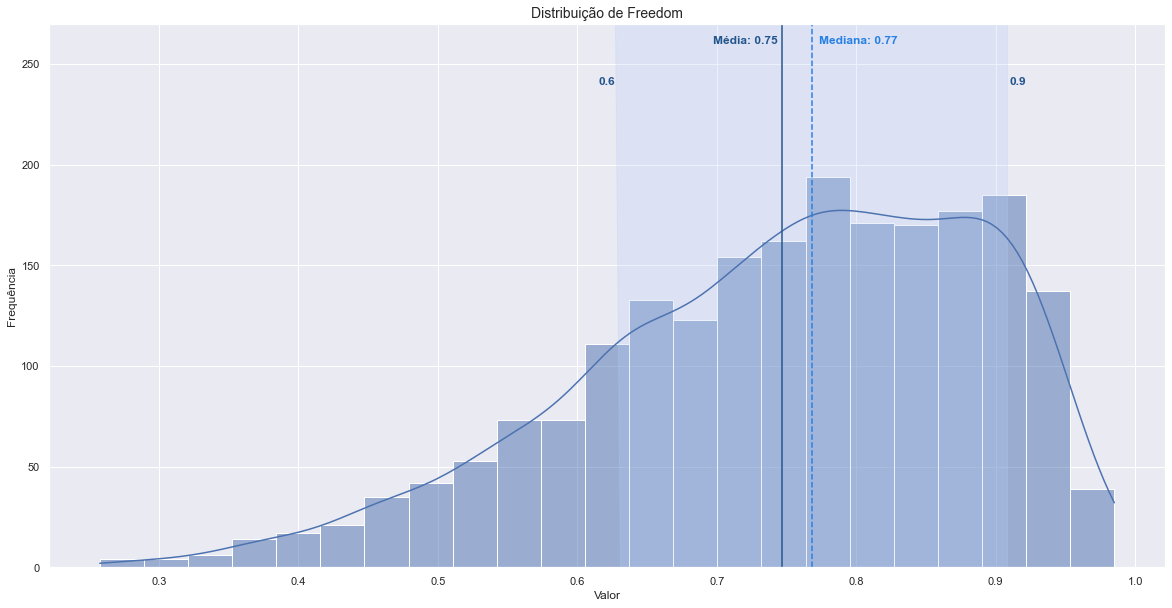

In [235]:
ax = sns.histplot(dataset['freedom'], kde=True)
plt.title('Distribuição de Freedom', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['freedom']), 2)
rounded_median = round(np.median(dataset['freedom']), 2)
rounded_std = round(np.std(dataset['freedom']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['freedom']), color='#24568E')
plt.text(np.mean(dataset['freedom']) - 0.05,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['freedom']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['freedom']) + 0.005,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.015, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

#### 2. Análises multivariadas recomendadas

* Relação entre freedom e score
* Relação entre freedom e região do mundo
* freedom (total e por região) ao longo do tempo

### `generosity`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da generosity?

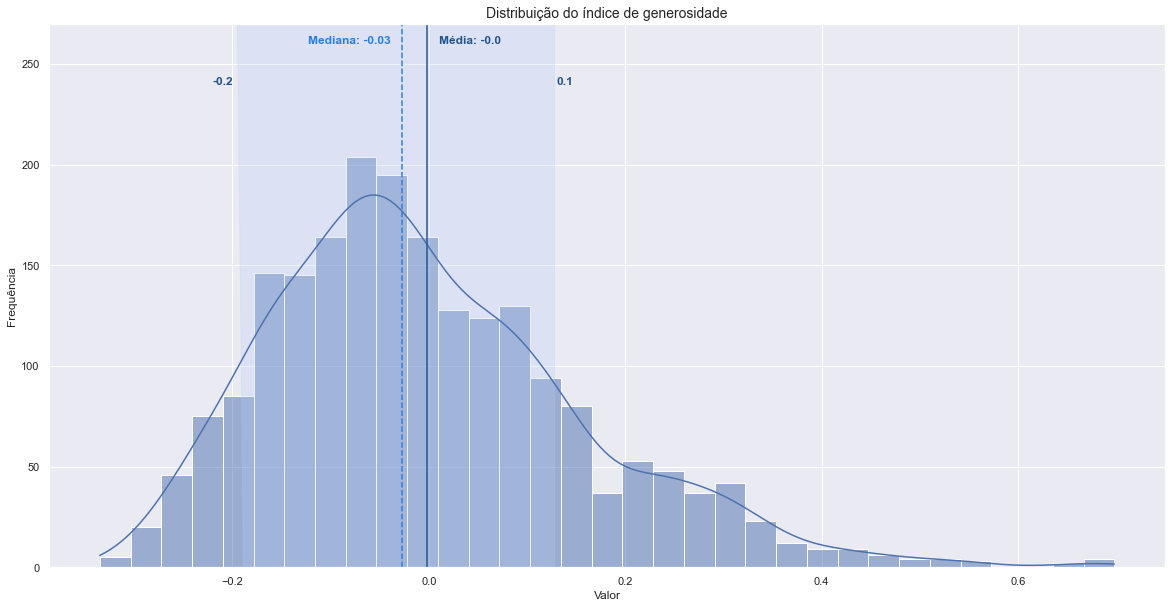

In [252]:
ax = sns.histplot(dataset['generosity'], kde=True)
plt.title('Distribuição do índice de generosidade', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['generosity']), 2)
rounded_median = round(np.median(dataset['generosity']), 2)
rounded_std = round(np.std(dataset['generosity']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['generosity']), color='#24568E')
plt.text(np.mean(dataset['generosity']) + 0.0125,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['generosity']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['generosity']) - 0.095,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.03, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

Esse dado já é previamente manipulado e ponderado pela pesquisa. Ou seja, diferente das outras variáveis, ele não corresponde apenas à média das respostas dos entrevistados. É necessário uma atenção extra ao realizar a normalização desses dados.

#### 2. Análises multivariadas recomendadas

* Relação entre generosity e score
* Relação entre generosity e região do mundo
* generosity (total e por região) ao longo do tempo

### `corruption`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da corruption?

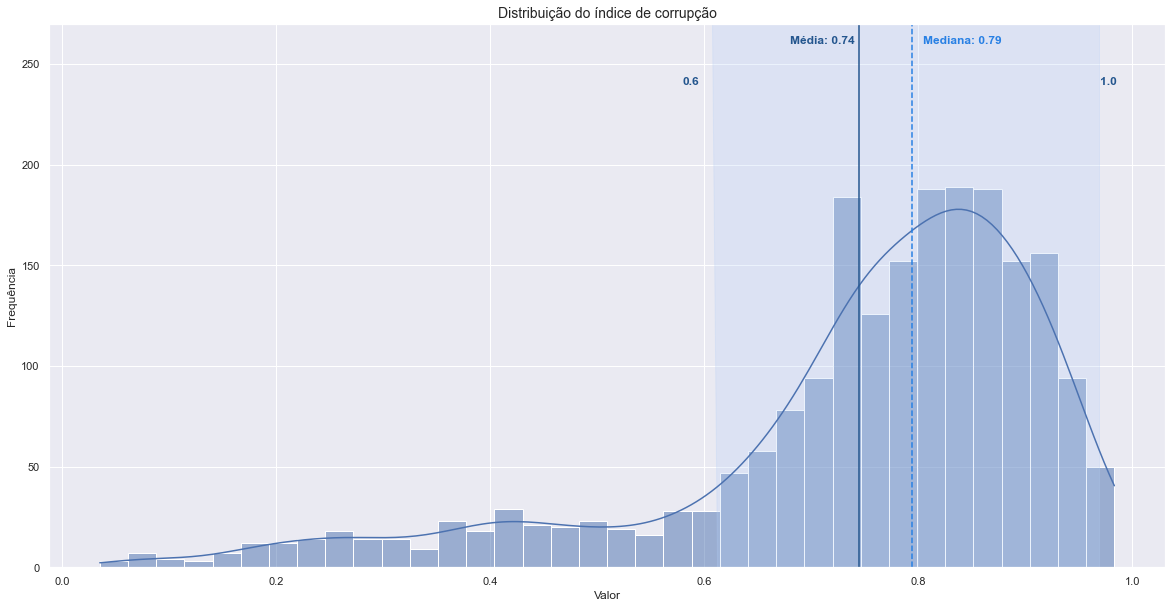

In [261]:
ax = sns.histplot(dataset['corruption'], kde=True)
plt.title('Distribuição do índice de corrupção', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['corruption']), 2)
rounded_median = round(np.median(dataset['corruption']), 2)
rounded_std = round(np.std(dataset['corruption']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['corruption']), color='#24568E')
plt.text(np.mean(dataset['corruption']) - 0.065,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['corruption']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['corruption']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.03, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

#### 2. Análises multivariadas recomendadas

* Relação entre corruption e score
* Relação entre corruption e região do mundo
* corruption (total e por região) ao longo do tempo

### `positive_affect`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da positive_affect?

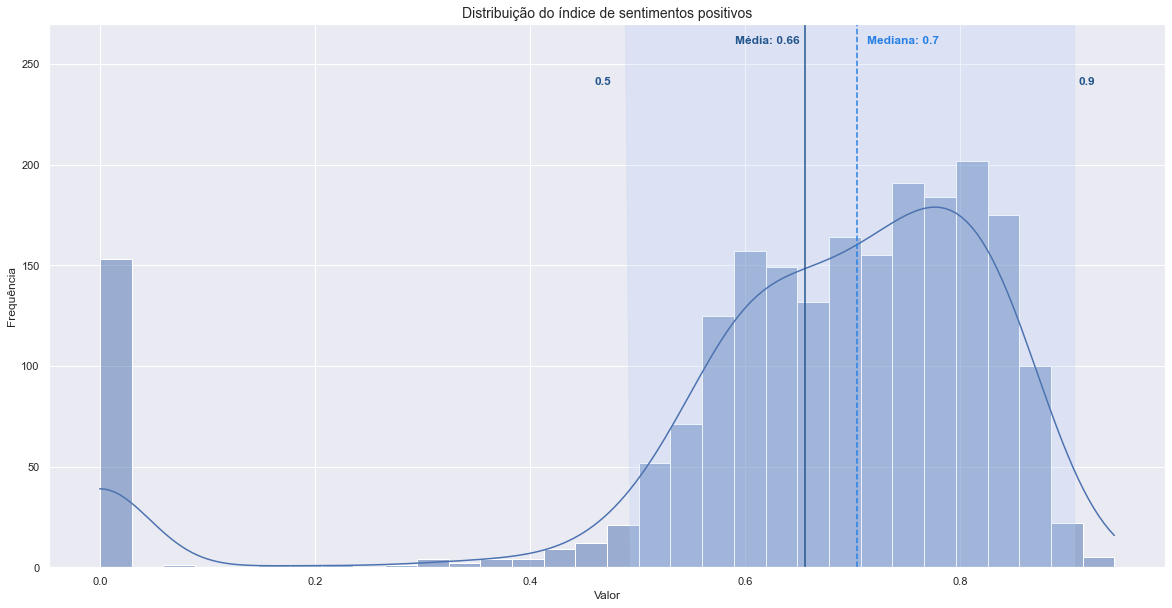

In [262]:
ax = sns.histplot(dataset['positive_affect'], kde=True)
plt.title('Distribuição do índice de sentimentos positivos', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['positive_affect']), 2)
rounded_median = round(np.median(dataset['positive_affect']), 2)
rounded_std = round(np.std(dataset['positive_affect']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['positive_affect']), color='#24568E')
plt.text(np.mean(dataset['positive_affect']) - 0.065,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['positive_affect']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['positive_affect']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.03, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

Existe um número razoável de valores zerados. Será que seriam valores faltantes ou realmente países onde a resposta foi zero?

#### 2. Análises multivariadas recomendadas

* Relação entre positive_affect e score
* Relação entre positive_affect e região do mundo
* positive_affect (total e por região) ao longo do tempo
* verificar score dos países com positive_affect = 0

### `negative_affect`

Variável **quantitativa numérica**. A visualização mais adequada para este tipo de dado em uma análise exploratória é histograma combinado com o gráfico de densidade.

#### 1. Qual a distribuição da negative_affect?

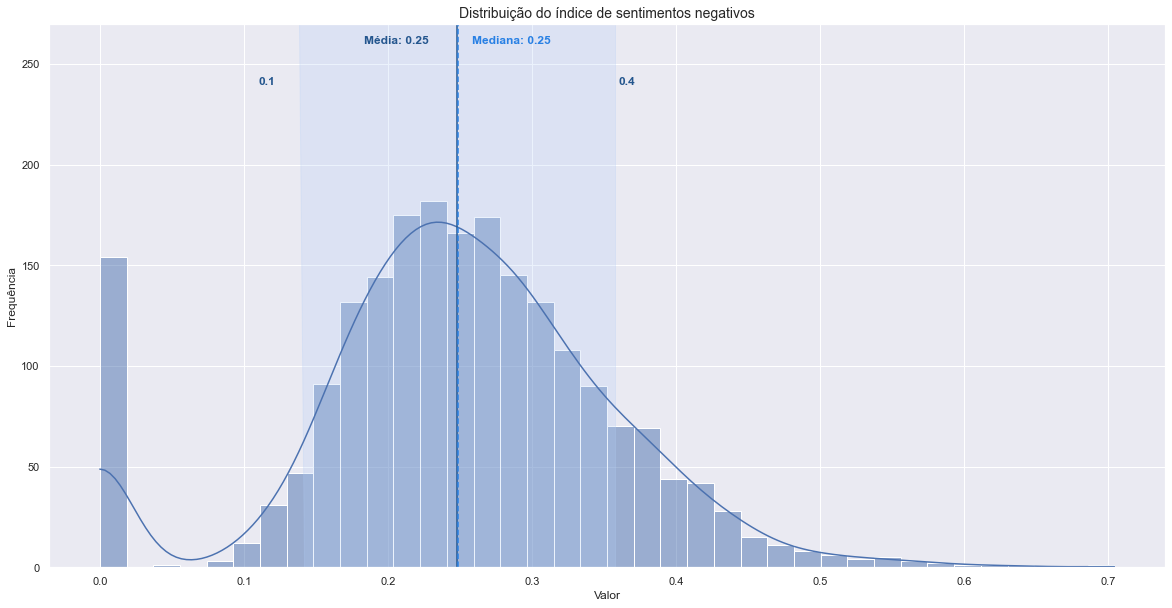

In [263]:
ax = sns.histplot(dataset['negative_affect'], kde=True)
plt.title('Distribuição do índice de sentimentos negativos', fontsize=14)
plt.xlabel('Valor')
plt.ylabel('Frequência')

rounded_mean = round(np.mean(dataset['negative_affect']), 2)
rounded_median = round(np.median(dataset['negative_affect']), 2)
rounded_std = round(np.std(dataset['negative_affect']), 2)
lower_std = rounded_median - (rounded_std)
upper_std = rounded_median + (rounded_std)

plt.axvline(x=np.mean(dataset['negative_affect']), color='#24568E')
plt.text(np.mean(dataset['negative_affect']) - 0.065,260,f'Média: {rounded_mean}', color='#24568E', weight='bold')
plt.axvline(x=np.median(dataset['negative_affect']), color='#2880E4', linestyle='--')
plt.text(np.median(dataset['negative_affect']) + 0.01,260,f'Mediana: {rounded_median}', color='#2880E4', weight='bold')

p1 = plt.axvline(x=lower_std,color='#B3CEF700')
plt.text(lower_std - 0.03, 240,str(round(lower_std, 1)),  color='#24568E', weight='bold')
p2 = plt.axvline(x=upper_std,color='#B3CEF700')
plt.text(upper_std, 240,str(round(upper_std, 1)), color='#24568E', weight='bold')

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, [270],  where=(kde_x > lower_std) & (kde_x < upper_std),  interpolate=True, color='#B3CEF740')
plt.ylim(0, 270)

plt.show();

Também existe um número razoável (e semelhante) de respostas zeradas. Caso forem as mesmas de positive_affect, é porque não há dados para essa variável no país selecionado e talvez seja necessário criar mais uma etapa de preparação dos dados.

#### 2. Análises multivariadas recomendadas

* Relação entre negative_affect e score
* Relação entre negative_affect e região do mundo
* negative_affect (total e por região) ao longo do tempo
* verificar score dos países com negative_affect = 0 e analisar se são os mesmos com positive_affect = 0 